# Dimensionality Reduction Using UMAP

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


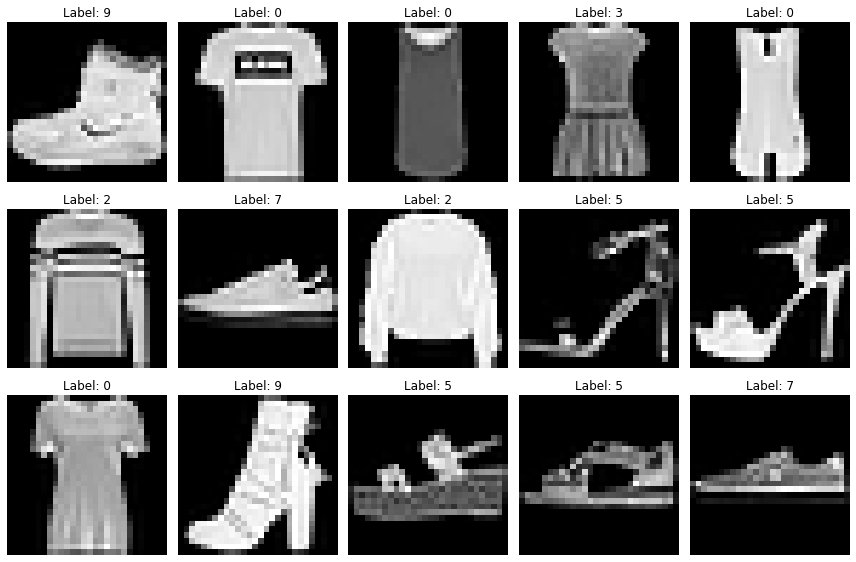

In [2]:
# Display the head of the dataset
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize the data
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

In [4]:
# Reshape the data into the format suitable for DataFrame
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Perform UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=50)  
x_train_umap = umap_reducer.fit_transform(x_train_flat)
x_test_umap = umap_reducer.transform(x_test_flat)


In [5]:
# Create DataFrame for train and test data
train = pd.DataFrame(x_train_umap)
train['label'] = y_train

test = pd.DataFrame(x_test_umap)
test['label'] = y_test

# Print shapes of the datasets
print("Train DataFrame shape:", train.shape)
print("Test DataFrame shape:", test.shape)

Train DataFrame shape: (60000, 51)
Test DataFrame shape: (10000, 51)


In [6]:
# Display the first few rows of train DataFrame
print(train.head())

          0         1         2         3         4         5         6  \
0  9.120434  5.306443  2.379488  5.420953  6.860538  5.580025  5.363838   
1 -0.125940  8.007625  5.696591  8.645932  3.479631  4.279433  6.854311   
2 -0.007288  6.535369  5.548292  6.893505  4.797792  6.071019  4.614064   
3 -0.217246  6.747142  5.595836  7.519764  4.355878  5.836915  4.957555   
4 -0.709628  5.824430  5.595377  8.200891  3.955631  6.338545  4.158606   

          7         8         9  ...        41        42        43        44  \
0  5.449437  5.397707  5.985424  ...  6.178060  5.021524  5.997451  3.405645   
1  4.782056  6.034447  5.851786  ...  6.167706  5.025546  6.021816  3.444329   
2  4.651394  6.092118  5.220998  ...  6.187080  5.086525  5.979320  3.403083   
3  4.747072  5.912579  5.448471  ...  6.174479  5.079227  5.987948  3.406970   
4  4.933566  5.394932  5.688452  ...  6.160213  5.110791  6.002364  3.415253   

         45        46        47        48        49  label  
0  6.22

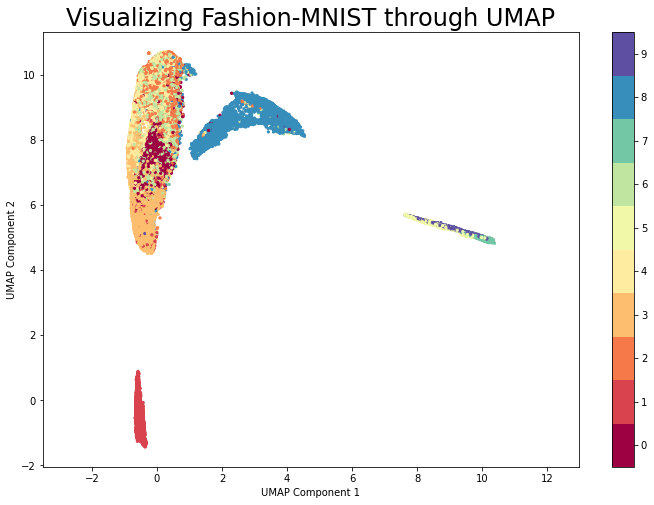

In [7]:
# Plot the first two principal components of each point to learn about the data
plt.figure(figsize=(12, 8))
plt.scatter(x_train_umap[:, 0], x_train_umap[:, 1], s=5, c=y_train, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Fashion-MNIST through UMAP', fontsize=24)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


In [8]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Training the SVM classifier
svm_classifier.fit(x_train_umap, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(x_test_umap)


In [10]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.87      0.76      1000
           1       0.99      0.94      0.97      1000
           2       0.56      0.63      0.59      1000
           3       0.83      0.83      0.83      1000
           4       0.55      0.60      0.57      1000
           5       0.93      0.82      0.87      1000
           6       0.49      0.32      0.38      1000
           7       0.85      0.88      0.86      1000
           8       0.96      0.89      0.93      1000
           9       0.86      0.93      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



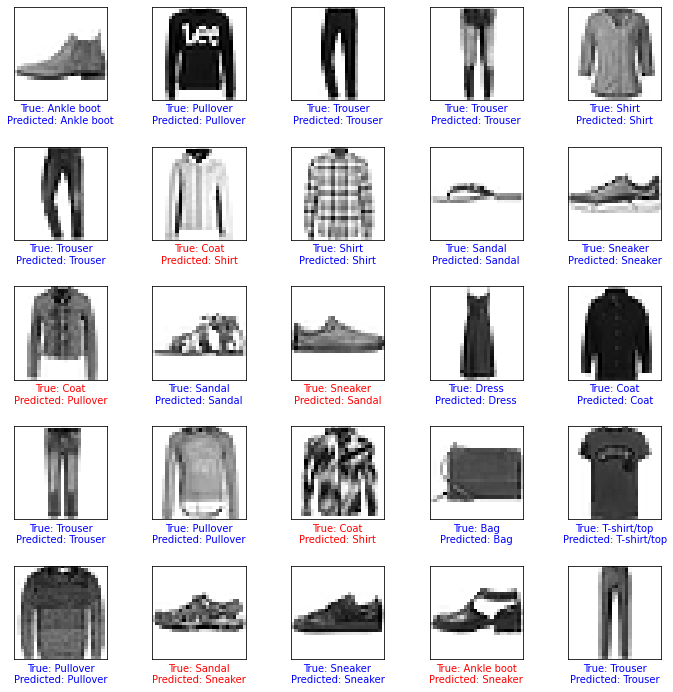

In [11]:
# Displaying a few sample images along with predicted labels and true labels
plt.figure(figsize=(12, 12))  
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)  
    predicted_label = y_pred[i]
    true_label = y_test[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}", color=color)
plt.subplots_adjust(hspace=0.5)  
plt.show()